In [1]:
# auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time

In [127]:
from data_simulation import MedicalDataSimulator
# Create simulator
simulator = MedicalDataSimulator(n_samples=5000)  # Using your age count as reference

# Generate dataset
df = simulator.generate_dataset()

df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'])
df['Trigger Date'] = pd.to_datetime(df['Trigger Date'])
# Save to CSV
df.to_csv('simulated_medical_data.csv', index=False)

# Verify age distribution
age_stats = df[df['Age at Egg Collection'] != -100]['Age at Egg Collection'].describe()
print("\nAge Statistics:")
print(age_stats)

# Verify weight distribution
weight_stats = df[df['Weight_kg'] != -1]['Weight_kg'].describe()
print("\nWeight Statistics:")
print(weight_stats)
print('New data saved to simulated_medical_data.csv')
# Verify follicle growth (sample one record)


days between: 14
n_scans: 2
scan_days: [9, 13]
days between: 12
n_scans: 1
scan_days: [4]
days between: 13
n_scans: 3
scan_days: [5, 6, 8]
days between: 14
n_scans: 3
scan_days: [5, 8, 14]
days between: 14
n_scans: 1
scan_days: [3]
days between: 13
n_scans: 1
scan_days: [5]
days between: 10
n_scans: 4
scan_days: [3, 4, 7, 9]
days between: 11
n_scans: 2
scan_days: [8, 11]
days between: 10
n_scans: 4
scan_days: [3, 4, 5, 10]
days between: 10
n_scans: 1
scan_days: [3]
days between: 10
n_scans: 4
scan_days: [4, 7, 9, 10]
days between: 11
n_scans: 4
scan_days: [6, 7, 9, 10]
days between: 13
n_scans: 1
scan_days: [6]
days between: 11
n_scans: 2
scan_days: [4, 8]
days between: 13
n_scans: 4
scan_days: [8, 11, 12, 13]
days between: 13
n_scans: 4
scan_days: [4, 7, 9, 12]
days between: 10
n_scans: 4
scan_days: [3, 4, 8, 10]
days between: 14
n_scans: 3
scan_days: [7, 11, 12]
days between: 13
n_scans: 3
scan_days: [3, 5, 13]
days between: 13
n_scans: 1
scan_days: [4]
days between: 13
n_scans: 4
sc

In [128]:
df

,,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Trigger Date,trig_drug,trig_dose,trig_units,DoT Follicles,Tracking Scans,AFC_result,amh_value,fsh_values,lh_values,Trigger Day
0,0,CMM,CLINIC-189942,CYCLE-241901,2021-03-24,35.849349,26.02,67.774986,161.4,NaT,NaN,NaN,NaN,NaN,"[[9.0, -4.0, 2021-04-02 00:00:00, [15.5, 16.3,...",NaN,NaN,NaN,NaN,NaN
1,1,WESX,CLINIC-832928,CYCLE-330762,2020-06-12,39.498149,28.62,75.852956,162.8,2020-06-24,Drug_9,6500.0,mcg,NaN,"[[4.0, -4.0, 2020-06-16 00:00:00, [11.3, 12.2,...",NaN,NaN,NaN,NaN,12.0
2,2,CMM,CLINIC-772255,CYCLE-824234,2021-11-05,-100.000000,-1.00,-1.000000,-1.0,2021-11-18,Drug_1,250.0,mg,NaN,"[[5.0, -4.0, 2021-11-10 00:00:00, [10.9, 11.2,...",NaN,NaN,NaN,NaN,13.0
3,3,WESX,CLINIC-534770,CYCLE-177300,2022-02-25,-100.000000,-1.00,-1.000000,-1.0,NaT,NaN,NaN,NaN,NaN,"[[5.0, -4.0, 2022-03-02 00:00:00, [10.0, 11.5,...",NaN,NaN,NaN,NaN,NaN
4,4,WESX,CLINIC-769988,CYCLE-527286,2022-12-29,40.378866,24.43,68.716842,167.7,2023-01-12,Drug_6,10000.0,IU,NaN,"[[3.0, -4.0, 2023-01-01 00:00:00, [9.0, 9.0, 9...",NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,CMM,CLINIC-84211,CYCLE-310181,2022-11-05,37.281889,36.15,85.181637,153.5,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2022-11-08 00:00:00, [8.6, 8.8, 8...",NaN,NaN,NaN,NaN,NaN
4996,4996,CMM,CLINIC-640235,CYCLE-365555,2022-05-04,33.748365,24.96,68.372256,165.5,2022-05-16,Drug_8,6500.0,mg,NaN,"[[3.0, -4.0, 2022-05-07 00:00:00, [9.9, 10.0, ...",NaN,NaN,NaN,NaN,12.0
4997,4997,WESX,CLINIC-533635,CYCLE-289428,2020-07-08,-100.000000,-1.00,-1.000000,-1.0,2020-07-21,Drug_1,10000.0,j.m.,NaN,"[[7.0, -4.0, 2020-07-15 00:00:00, [12.2, 12.8,...",NaN,NaN,NaN,NaN,13.0
4998,4998,WESX,CLINIC-212227,CYCLE-174087,2021-02-16,39.919833,20.17,59.729489,172.1,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2021-02-19 00:00:00, [8.2, 8.2, 8...",NaN,NaN,NaN,NaN,NaN


In [129]:
len(df['Tracking Scans'].iloc[0])
# check average number of scans
scans = [len(scan) for scan in df['Tracking Scans']]

(array([1239.,    0.,    0., 1218.,    0.,    0., 1227.,    0.,    0.,
        1316.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

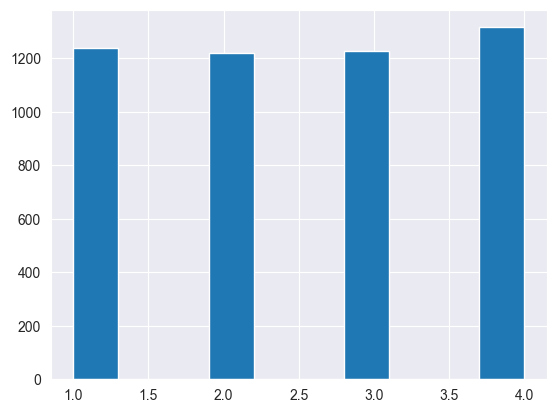

In [130]:
plt.hist(scans)

In [131]:
df['Tracking Scans'].iloc[0]

[[9.0,
  -4.0,
  '2021-04-02 00:00:00',
  [15.5, 16.3, 19.0, 19.7, 20.3, 22.9, 25.1],
  138.8,
  7],
 [13.0,
  -4.0,
  '2021-04-06 00:00:00',
  [20.3, 21.3, 25.5, 25.8, 27.0, 29.9, 32.6],
  182.4,
  7]]

In [132]:
df

,,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Trigger Date,trig_drug,trig_dose,trig_units,DoT Follicles,Tracking Scans,AFC_result,amh_value,fsh_values,lh_values,Trigger Day
0,0,CMM,CLINIC-189942,CYCLE-241901,2021-03-24,35.849349,26.02,67.774986,161.4,NaT,NaN,NaN,NaN,NaN,"[[9.0, -4.0, 2021-04-02 00:00:00, [15.5, 16.3,...",NaN,NaN,NaN,NaN,NaN
1,1,WESX,CLINIC-832928,CYCLE-330762,2020-06-12,39.498149,28.62,75.852956,162.8,2020-06-24,Drug_9,6500.0,mcg,NaN,"[[4.0, -4.0, 2020-06-16 00:00:00, [11.3, 12.2,...",NaN,NaN,NaN,NaN,12.0
2,2,CMM,CLINIC-772255,CYCLE-824234,2021-11-05,-100.000000,-1.00,-1.000000,-1.0,2021-11-18,Drug_1,250.0,mg,NaN,"[[5.0, -4.0, 2021-11-10 00:00:00, [10.9, 11.2,...",NaN,NaN,NaN,NaN,13.0
3,3,WESX,CLINIC-534770,CYCLE-177300,2022-02-25,-100.000000,-1.00,-1.000000,-1.0,NaT,NaN,NaN,NaN,NaN,"[[5.0, -4.0, 2022-03-02 00:00:00, [10.0, 11.5,...",NaN,NaN,NaN,NaN,NaN
4,4,WESX,CLINIC-769988,CYCLE-527286,2022-12-29,40.378866,24.43,68.716842,167.7,2023-01-12,Drug_6,10000.0,IU,NaN,"[[3.0, -4.0, 2023-01-01 00:00:00, [9.0, 9.0, 9...",NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,CMM,CLINIC-84211,CYCLE-310181,2022-11-05,37.281889,36.15,85.181637,153.5,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2022-11-08 00:00:00, [8.6, 8.8, 8...",NaN,NaN,NaN,NaN,NaN
4996,4996,CMM,CLINIC-640235,CYCLE-365555,2022-05-04,33.748365,24.96,68.372256,165.5,2022-05-16,Drug_8,6500.0,mg,NaN,"[[3.0, -4.0, 2022-05-07 00:00:00, [9.9, 10.0, ...",NaN,NaN,NaN,NaN,12.0
4997,4997,WESX,CLINIC-533635,CYCLE-289428,2020-07-08,-100.000000,-1.00,-1.000000,-1.0,2020-07-21,Drug_1,10000.0,j.m.,NaN,"[[7.0, -4.0, 2020-07-15 00:00:00, [12.2, 12.8,...",NaN,NaN,NaN,NaN,13.0
4998,4998,WESX,CLINIC-212227,CYCLE-174087,2021-02-16,39.919833,20.17,59.729489,172.1,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2021-02-19 00:00:00, [8.2, 8.2, 8...",NaN,NaN,NaN,NaN,NaN


In [133]:
df[df['Cycle Number'] == 'CYCLE-175']

,,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Trigger Date,trig_drug,trig_dose,trig_units,DoT Follicles,Tracking Scans,AFC_result,amh_value,fsh_values,lh_values,Trigger Day


In [134]:
len(df)

5000

In [135]:
from data_prep.data_prep_tfp import prep_data_tfp

cycles = prep_data_tfp(df=df, drop_not_trigger_scan=False)

100%|██████████| 2234/2234 [00:00<00:00, 8898.84it/s]


In [136]:
cycles[500].profiles

{'4': <data_model.cycle_model.Profile.Profile at 0x124553440>,
 '6': <data_model.cycle_model.Profile.Profile at 0x124553620>,
 '7': <data_model.cycle_model.Profile.Profile at 0x124552180>,
 '10': <data_model.cycle_model.Profile.Profile at 0x124551760>}

In [123]:
cycles[500].key

'CYCLE-175'

In [56]:
cycles[2].key

'CYCLE-289'

In [55]:
cycles[2].profiles['10'].follicles

[16.7, 19.1, 19.3, 21.0, 22.8, 25.5]

(array([708.,   0., 718.,   0.,   0., 806.,   0.,   1.,   0.,   1.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

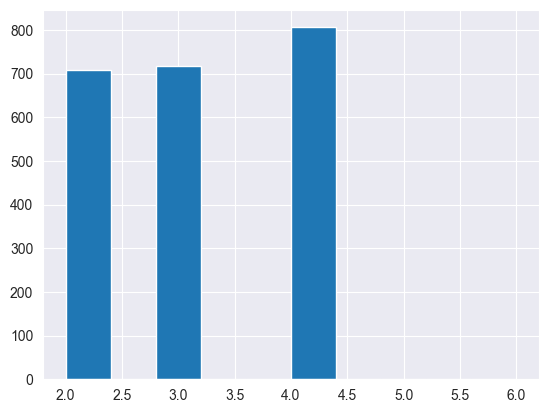

In [137]:
len_profiles = [len(cycle.profiles) for cycle in cycles]
plt.hist(len_profiles)

In [39]:
len(cycles)

819

In [40]:
df

,,Clinic,PatientIdentifier,Cycle Number,Treatment Start Date,Age at Egg Collection,BMI,Weight_kg,Height_cm,Trigger Date,trig_drug,trig_dose,trig_units,DoT Follicles,Tracking Scans,AFC_result,amh_value,fsh_values,lh_values,Trigger Day
0,0,WESX,CLINIC-823148,CYCLE-803,2020-07-28,34.406962,20.59,58.241364,168.2,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2020-07-31 00:00:00, [7.1, 7.8, 8...",NaN,NaN,NaN,NaN,NaN
1,1,WESX,CLINIC-468150,CYCLE-428,2021-05-17,37.043111,15.96,47.614959,172.7,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2021-05-20 00:00:00, [7.4, 8.7, 8...",NaN,NaN,NaN,NaN,NaN
2,2,WESX,CLINIC-412906,CYCLE-201,2020-05-15,-100.000000,-1.00,-1.000000,-1.0,2020-05-29,Drug_7,6500.0,mg,NaN,"[[10.0, -4.0, 2020-05-25 00:00:00, [14.3, 17.8...",NaN,NaN,NaN,NaN,14.0
3,3,WESX,CLINIC-879166,CYCLE-492,2020-05-09,-100.000000,-1.00,-1.000000,-1.0,2020-05-22,Drug_1,6500.0,mcg,NaN,"[[12.0, -4.0, 2020-05-21 00:00:00, [17.1, 17.6...",NaN,NaN,NaN,NaN,13.0
4,4,WESX,CLINIC-487311,CYCLE-656,2021-12-17,33.472980,25.41,63.514256,158.1,2021-12-27,Drug_5,250.0,j.m.,NaN,"[[7.0, -4.0, 2021-12-24 00:00:00, [13.0, 13.1,...",NaN,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,WESX,CLINIC-567702,CYCLE-565,2021-03-10,41.911554,24.65,73.432347,172.6,2021-03-21,Drug_10,250.0,j.m.,NaN,"[[11.0, -4.0, 2021-03-21 00:00:00, [19.0, 22.4...",NaN,NaN,NaN,NaN,11.0
4996,4996,WESX,CLINIC-235950,CYCLE-310,2022-09-01,-100.000000,-1.00,-1.000000,-1.0,NaT,NaN,NaN,NaN,NaN,"[[3.0, -4.0, 2022-09-04 00:00:00, [8.0, 9.2, 9...",NaN,NaN,NaN,NaN,NaN
4997,4997,CMM,CLINIC-622886,CYCLE-743,2021-11-26,-100.000000,-1.00,-1.000000,-1.0,NaT,NaN,NaN,NaN,NaN,"[[5.0, -4.0, 2021-12-01 00:00:00, [9.7, 10.8, ...",NaN,NaN,NaN,NaN,NaN
4998,4998,WESX,CLINIC-320384,CYCLE-134,2020-10-18,33.751766,20.07,63.302259,177.6,NaT,NaN,NaN,NaN,NaN,"[[4.0, -4.0, 2020-10-22 00:00:00, [8.7, 10.1, ...",NaN,NaN,NaN,NaN,NaN


In [138]:
# make responder pd null
df['responder'] = np.nan
df['os_init_dose'] = np.nan
df['protocol_map'] = np.nan

In [139]:
from data_prep.data_prep_tfp import add_features_to_cycles

cycles_with_features = add_features_to_cycles(cycles, df)

100%|██████████| 2234/2234 [00:00<00:00, 2447.63it/s]


In [140]:

from data_prep.data_prep_tfp import clean_cycles, make_bins_profiles

cycles = clean_cycles(cycles_with_features)

make_bins_profiles(cycles)

In [44]:
cycles[0].profiles['10'].follicles

[14.3, 17.8, 18.5, 18.8, 18.8, 19.1, 19.4, 27.0]

(array([708.,   0., 718.,   0.,   0., 806.,   0.,   1.,   0.,   1.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

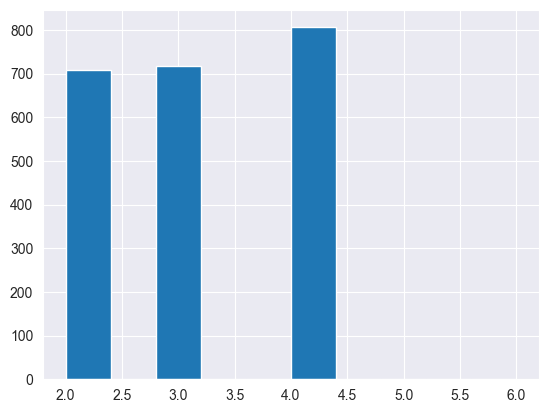

In [141]:
len_profiles = [len(cycle.profiles) for cycle in cycles]
plt.hist(len_profiles)

In [142]:
# save cycles object pickle
import pickle

with open('cycles.pkl', 'wb') as f:
    pickle.dump(cycles, f)